# Intro 3: Funktionsanpassning i Python

I denna notebook ska vi bekanta oss med *funktionsanpassning*, ett mycket viktigt användningsområde för programmering inom fysiken. Vi kommer här att använda oss av *linjär regression* - anpassning av en förstagradsfunktion till givna datapunkter. En mer avancerad anpassning görs i dokumentet *"Att anpassa en funktion till ett diagram"*, som också hittas i denna Jupyter Book.

Vi börjar med att importera de viktiga paketen **matplotlib.pyplot** och **numpy**. Vi kommer också senare att använda en funktion från **scipy**.

In [2]:
import matplotlib.pyplot as plt  # matplotlib.pyplot innehåller verktyg för att rita grafer och diagram.
import numpy as np               

### Funktionsanpassning

När vi utför fysikaliska experiment vill vi ofta jämföra våra resultat med en teoretisk modell. Funktionsanpassningen är ett sätt för oss att se hur bra den teoretiska modellen följs.

Som exempel kan vi tänka oss ett experiment som är typiskt för gymnasiets första fysikkurs. Eleverna blir tilldelade varierande järnföremål (vikter, bultar och muttrar, t.ex.), och uppgiften är att bestämma densiteten för järn.

<img src= "files/nutsnbolts.PNG" width = 300>

Eleverna väger föremålen noga, och uppskattar föremålens volym genom geometriska beräkningar eller experimentellt genom att sänka dem i vatten (Arkimedes princip). Uppgiften är sedan att sammanställa resultaten i ett diagram och se det linjära sambandet. Vi tar en titt på detta diagram:

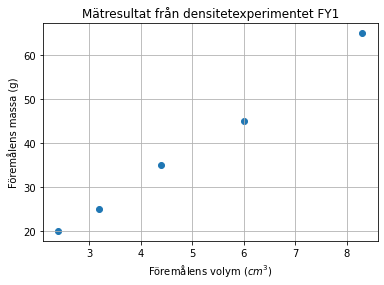

In [9]:
# Mätresultat:

# Volym i cm3
volymer = [3.2, 2.4, 6.0, 8.3, 4.4]
# Vikt i gram
vikter = [25, 20, 45, 65, 35]


                                                       # Vi använder matplotlib.pyplot (plt) för att rita ett diagram.
plt.scatter(volymer, vikter)                           # plt.scatter(x, y) ritar ut punkter utgående från listorna.
plt.title("Mätresultat från densitetexperimentet FY1") # plt.title ger en rubrik
plt.xlabel("Föremålens volym ($cm^3$)")                # plt.xlabel/ylabel ger förklaringar till axlarna.
plt.ylabel("Föremålens massa (g)")                      # Man kan använda $$-tecken för att avgränsa LaTeX-uttryck
plt.grid()                                             # plt.grid lägger till ett rutnät

plt.show()     

Vi har mätresultaten i ett diagram, och vi ser att storheterna rimligen har ett linjärt förhållande. Genom att anpassa en linje och beräkna linjens riktningskoefficient får vi reda på densiteten för järn.

$$ \rho = \frac{\Delta m}{\Delta V}$$

<img src="files/densitet.PNG" width=300>

I de första fysikkurserna anpassas den linjen ofta med ögonmått - uppskattad med linjal. Åtminstone gjorde man så innan GeoGebra och CAS-räknare blev allmänt använda och innan kursmaterialet var digitalt. Den noggrannheten är duglig i grundkurser, men självklart kommer resultaten att variera lite, och en mer exakt metod är viktig att känna till.

Med hjälp av programmering kan vi optimera anpassningen. Ett sätt att göra detta är att använda **scipy.stats.linregress**. Den funktionen anpassar en linje till de givna punkterna.

In [13]:
from scipy.stats import linregress

optimering = linregress(volymer,vikter)

print(optimering)

LinregressResult(slope=7.588479595521847, intercept=1.1199891657638261, rvalue=0.9982889345678648, pvalue=8.494196166006045e-05, stderr=0.2566258120358384)


Bland resultaten ser vi
- **slope** (riktningskoefficient) = 7.588
- **intercept** (skärningspunkt med y-axeln) = 1.120

Linjens ekvation är alltså $7.588\cdot x + 1.120$, och $7.588 \ g/{cm}^3$ är den beräknade densiteten för järn.

Vi ritar in den linjen i samma koordinatsystem för att jämföra.

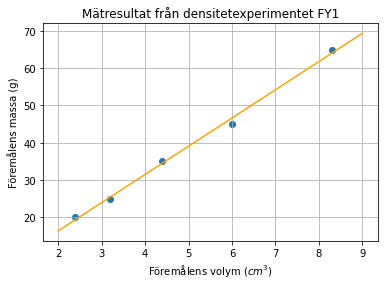

In [15]:
x = np.linspace(2, 9, 100)   # vi skapar en lista med 100 x-värden mellan 2 och 9
y = 7.588*x + 1.120          # vi skapar en lista med y-värden enligt den erhållna funktionen

# Vi ritar ut linjen med hjälp av plt.plot, och sedan upprepar vi alla kommandon som vi använde till den förra grafen.
plt.plot(x, y, color='orange')

plt.scatter(volymer, vikter)                           # plt.scatter(x, y) ritar ut punkter utgående från listorna.
plt.title("Mätresultat från densitetexperimentet FY1") # plt.title ger en rubrik
plt.xlabel("Föremålens volym ($cm^3$)")                # plt.xlabel/ylabel ger förklaringar till axlarna.
plt.ylabel("Föremålens massa (g)")                      # Man kan använda $$-tecken för att avgränsa LaTeX-uttryck
plt.grid() 

plt.show()

Nu har vi anpassat en linje - inte genom uppskattning, utan genom [minstakvadratmetoden](https://sv.wikipedia.org/wiki/Minstakvadratmetoden). Vi har också en beskrivande graf som visar den anpassade linjen tillsammans med datapunkterna.
  Du kan själv testa att anpassa en linje till ett eget set av datapunkter med samma metod som ovan, eller gå vidare till nästa nivå och se på hur vi kan anpassa en mer invecklad funktion till mätresultat. (Se dokumentet *Att anpassa en funktion till ett diagram*)
  
  Lycka till!